# 02. Feature Engineering - Exploration & Visualization

This notebook loads the **feature-engineered** data (`listings_featured.parquet`) created by `src/features.py`.

**Goal:** Visualize and understand the engineered features, evaluate their correlation with the target (`price`), and prototype potential new features before adding them to the main script. 🧪📊

**Tasks:**
1. Visualize engineered feature distributions.
2. Evaluate correlation between engineered features and the target variable.
3. Visualize feature effects on the target variable.
4. Prototype potential new features (e.g., transformations, interactions).

## 1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import warnings
%matplotlib inline
# Settings
plt.style.use('ggplot')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Define file path (relative to notebooks/ folder)
DATA_PATH = Path("../data/processed/listings_featured.parquet")

In [2]:
# Load the FEATURED data
try:
    df = pd.read_parquet(DATA_PATH)
    print(f"Loaded FEATURED data shape: {df.shape}")
    # Add log_price for visualization
    if 'price' in df.columns:
        df['price_log'] = np.log1p(df['price'])
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}. Please run src/features.py first.")
    df = None

Loaded FEATURED data shape: (15187, 100)


,id,source,neighborhood_overview,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,reviews_per_month_imputed,days_since_last_review,days_since_last_review_imputed,num_amenities,host_duration_days,days_since_first_review,distance_to_center,distance_to_poi_1_airport,distance_to_poi_2_station,spatial_cluster,has_wifi,has_kitchen,has_washer,has_air_conditioning,has_dryer,has_heating,has_tv,has_parking,has_iron,has_pool,has_hot_tub,amenities_count,description_sentiment,description_length,name_length,price_per_person,superhost_x_rating,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire rental unit,property_type_Entire townhouse,property_type_Other,property_type_Private room in home,property_type_Private room in rental unit,property_type_Room in hotel,price_log
0,5456.0,city scrape,My neighborhood is ideally located if you want...,8028.0,"Austin, TX",within a few hours,1.0,92%,1,East Downtown,1.0,2.0,"['email', 'phone']",t,1,Neighborhood highlights,78702.0,0.0,3.0,1.0,1 bath,1.0,2.0,101.0,2,90.0,2.0,2.0,90.0,90.0,2.0,90.0,None,1,30.0,60.0,90.0,336.0,711.0,27.0,0.0,185,33.0,162.0,16362.0,4.85,4.88,4.86,4.90,4.82,4.73,4.79,0.0,f,1.0,1.0,0.0,0.0,3.59,0.0,48.0,0.0,30.0,5962.0,5942.0,2.602051,17.267122,4.788003,7,1,1,0,1,1,1,1,0,1,0,0,30,0.275000,173,41,33.666667,4.85,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4.624973
1,5769.0,city scrape,Quiet neighborhood with lots of trees and good...,8186.0,"Austin, TX",within an hour,1.0,100%,0,SW Williamson Co.,1.0,4.0,"['email', 'phone', 'work_email']",t,1,Neighborhood highlights,78729.0,0.0,2.0,1.0,1 shared bath,1.0,1.0,45.0,1,14.0,1.0,1.0,14.0,14.0,1.0,14.0,None,1,4.0,4.0,4.0,4.0,304.0,5.0,3.0,4,5.0,30.0,1350.0,4.91,4.91,4.87,4.91,4.94,4.77,4.92,0.0,f,1.0,0.0,1.0,0.0,1.65,0.0,6.0,0.0,38.0,5959.0,5544.0,20.588397,17.914142,25.238892,8,1,0,0,1,1,1,1,1,1,0,0,38,0.000000,0,14,22.500000,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.828641
2,6413.0,previous scrape,Travis Heights is one of the oldest neighborho...,13879.0,"Austin, TX",within an hour,1.0,100%,1,Travis Heights,1.0,1.0,"['email', 'phone']",t,1,Neighborhood highlights,78704.0,0.0,2.0,0.0,1 bath,0.0,0.0,0.0,30,90.0,30.0,30.0,90.0,90.0,30.0,90.0,None,1,0.0,0.0,0.0,0.0,123.0,3.0,0.0,0,2.0,180.0,0.0,4.98,4.99,4.99,4.99,4.98,4.87,4.93,0.0,f,1.0,1.0,0.0,0.0,0.65,0.0,94.0,0.0,55.0,5902.0,5661.0,3.821810,18.375945,3.863106,7,1,1,1,1,1,1,1,1,1,0,0,55,0.280325,433,29,0.000000,4.98,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000
3,6448.0,city scrape,The neighborhood is fun and funky (but quiet)!...,14156.0,"Austin, TX",within an hour,1.0,96%,1,Zilker,1.0,2.0,"['email', 'phone']",t,1,Neighborhood highlights,78704.0,0.0,2.0,1.0,1 bath,1.0,2.0,155.0,3,365.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,None,1,10.0,33.0,62.0,312.0,338.0,15.0,1.0,149,20.0,90.0

## 2. Task 1: Visualize Engineered Features

Let's look at the distributions and relationships of some key features created in `src/features.py`.

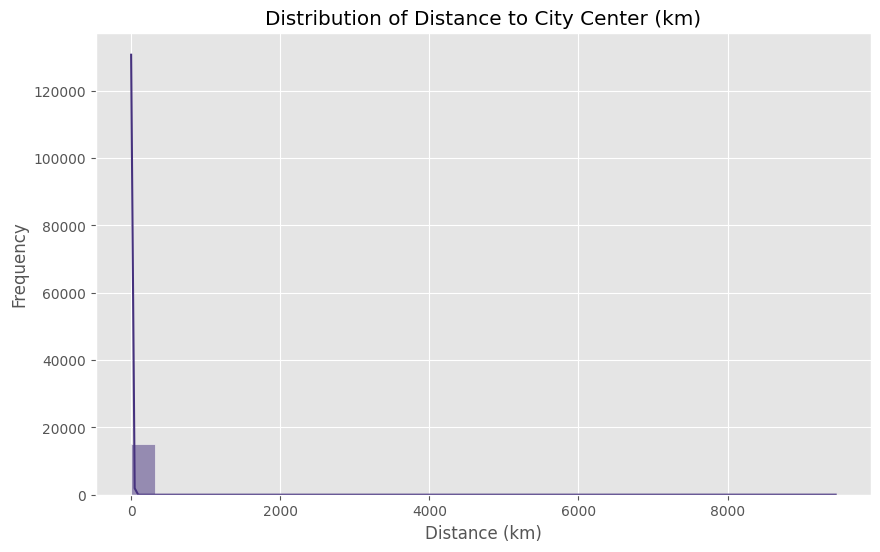

In [3]:
# Example: Distribution of 'distance_to_center'
if df is not None and 'distance_to_center' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['distance_to_center'], kde=True, bins=30)
    plt.title('Distribution of Distance to City Center (km)')
    plt.xlabel('Distance (km)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'distance_to_center' not found or data not loaded.")

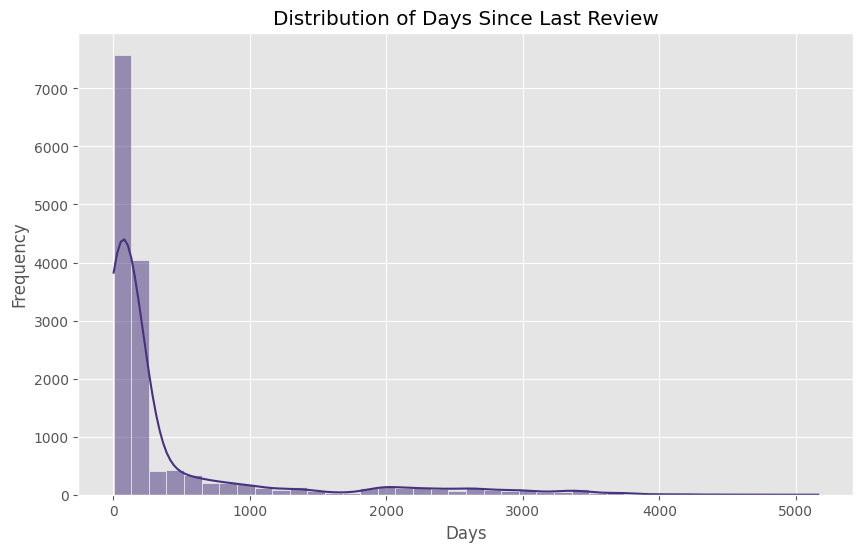

In [4]:
# Example: Distribution of 'days_since_last_review'
if df is not None and 'days_since_last_review' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['days_since_last_review'], kde=True, bins=40)
    plt.title('Distribution of Days Since Last Review')
    plt.xlabel('Days')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'days_since_last_review' not found or data not loaded.")

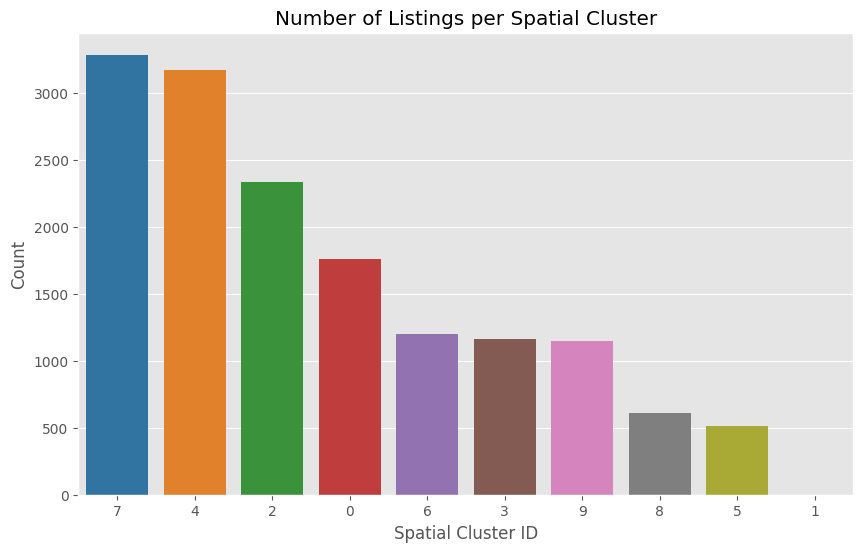

In [5]:
# Example: Count of listings per 'spatial_cluster'
if df is not None and 'spatial_cluster' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='spatial_cluster', palette='tab10', order=df['spatial_cluster'].value_counts().index)
    plt.title('Number of Listings per Spatial Cluster')
    plt.xlabel('Spatial Cluster ID')
    plt.ylabel('Count')
    plt.show()
else:
    print("'spatial_cluster' not found or data not loaded.")

## 3. Task 2: Evaluate Correlation with Target

Let's re-examine correlations, focusing on the newly engineered features against `price` (or `price_log`).

In [6]:
if df is not None and 'price' in df.columns:
    # Select numeric columns from the FEATURED dataset
    # Exclude IDs or high-cardinality categoricals if they were numerically encoded by mistake earlier
    numeric_cols_featured = df.select_dtypes(include=np.number).columns
    # Remove log price if present, as it's just a transformation of the target
    numeric_cols_featured = numeric_cols_featured.drop('price_log', errors='ignore')
    
    # Calculate Spearman correlation
    corr_matrix_featured = df[numeric_cols_featured].corr(method='spearman')
    
    # Show correlations with price 
    if 'price' in corr_matrix_featured.columns:
        price_corr_featured = corr_matrix_featured['price'].sort_values(ascending=False)
        print("\nTop correlations with Price (Spearman) - FEATURED DATA:")
        display(price_corr_featured.drop('price').head(20)) # Drop self-correlation
        print("\nBottom correlations with Price (Spearman) - FEATURED DATA:")
        display(price_corr_featured.tail(20))
    else:
        print("'price' column not found in correlation matrix.")
else:
    print("'price' column not found or data not loaded.")


Top correlations with Price (Spearman) - FEATURED DATA:


bathrooms                                      0.865611
beds                                           0.859940
price_per_person                               0.811028
availability_365                               0.576874
estimated_revenue_l365d                        0.566658
availability_90                                0.526457
availability_60                                0.513491
availability_30                                0.490951
host_response_rate                             0.460115
accommodates                                   0.435533
bedrooms                                       0.432835
amenities_count                                0.405517
num_amenities                                  0.405515
number_of_reviews_ltm                          0.369985
property_type_Entire home                      0.350793
has_availability                               0.347222
estimated_occupancy_l365d                      0.339870
calculated_host_listings_count_entire_homes    0


Bottom correlations with Price (Spearman) - FEATURED DATA:


property_type_Entire guesthouse                -0.008135
minimum_maximum_nights                         -0.011924
property_type_Entire guest suite               -0.025382
property_type_Room in hotel                    -0.038985
property_type_Other                            -0.045649
days_since_first_review                        -0.053897
room_type_Shared room                          -0.059209
room_type_Hotel room                           -0.060786
neighbourhood_cleansed                         -0.069620
calculated_host_listings_count_shared_rooms    -0.074989
host_duration_days                             -0.094960
property_type_Private room in rental unit      -0.138232
property_type_Entire rental unit               -0.144680
property_type_Private room in home             -0.252099
calculated_host_listings_count_private_rooms   -0.270388
room_type_Private room                         -0.290016
days_since_last_review                         -0.406392
license                        

## 4. Task 3: Visualize Feature Effects

How do some key engineered features relate to the price?

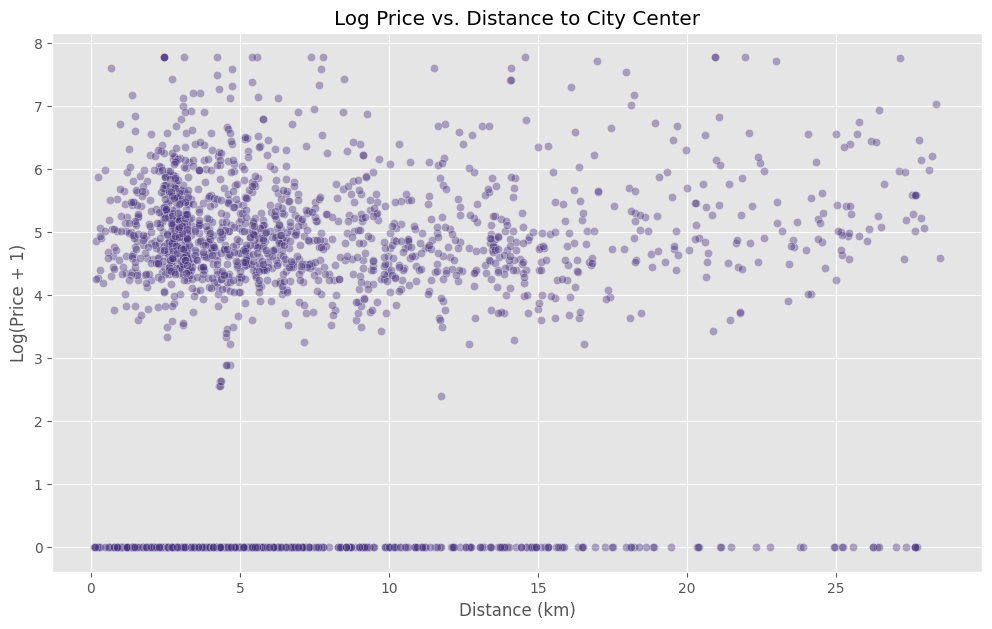

In [7]:
# Example: Price vs 'distance_to_center'
if df is not None and 'distance_to_center' in df.columns and 'price_log' in df.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df.sample(min(2000, len(df))), x='distance_to_center', y='price_log', alpha=0.4)
    plt.title('Log Price vs. Distance to City Center')
    plt.xlabel('Distance (km)')
    plt.ylabel('Log(Price + 1)')
    # Add a trend line (optional)
    # sns.regplot(data=df.sample(min(2000, len(df))), x='distance_to_center', y='price_log', scatter=False, color='red', lowess=True)
    plt.show()
else:
    print("'distance_to_center' or 'price_log' not found or data not loaded.")

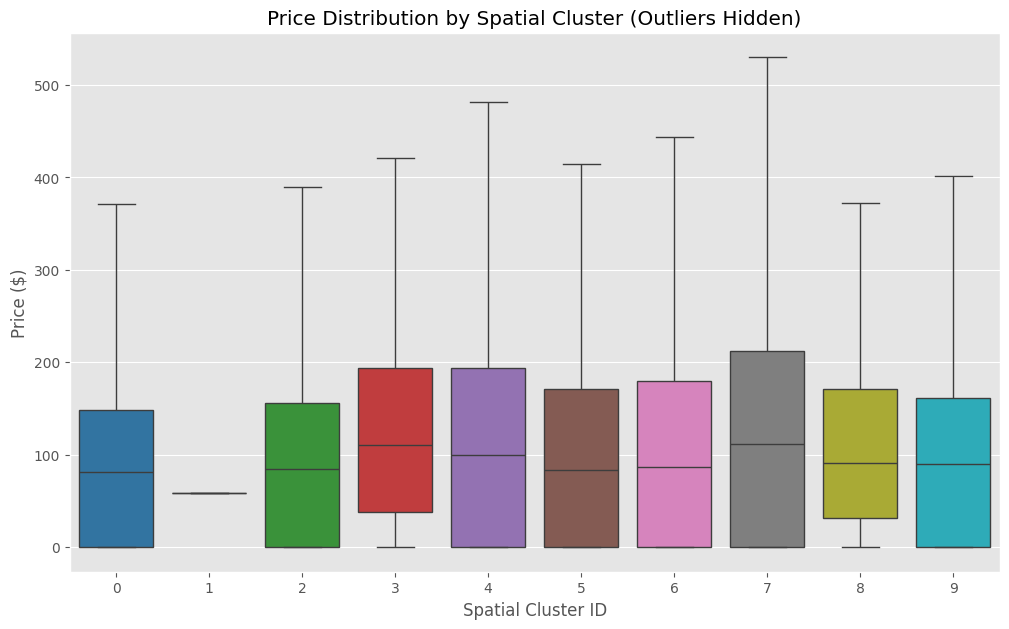

In [8]:
# Example: Price by 'spatial_cluster'
if df is not None and 'spatial_cluster' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(12, 7))
    # Ensure spatial_cluster is treated as categorical for plotting
    df_plot = df.copy()
    df_plot['spatial_cluster'] = df_plot['spatial_cluster'].astype('category')
    sns.boxplot(data=df_plot, x='spatial_cluster', y='price', showfliers=False, palette='tab10')
    plt.title('Price Distribution by Spatial Cluster (Outliers Hidden)')
    plt.xlabel('Spatial Cluster ID')
    plt.ylabel('Price ($)')
    plt.show()
else:
    print("'spatial_cluster' or 'price' not found or data not loaded.")

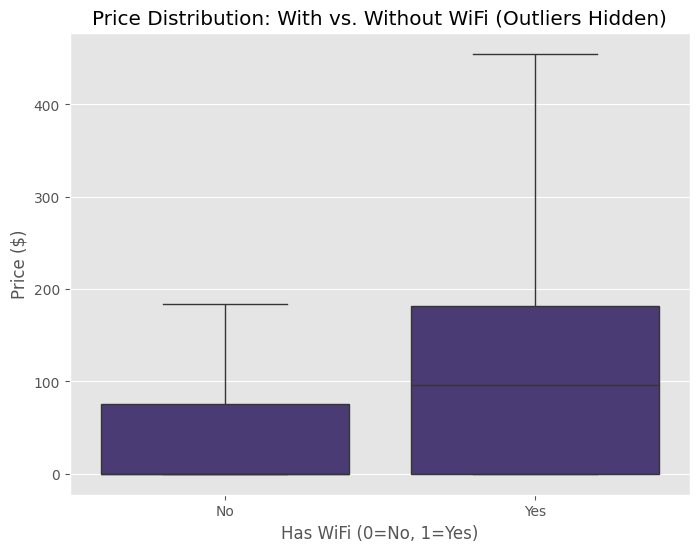

In [9]:
# Example: Impact of a key amenity (e.g., WiFi)
if df is not None and 'has_wifi' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='has_wifi', y='price', showfliers=False)
    plt.title('Price Distribution: With vs. Without WiFi (Outliers Hidden)')
    plt.xlabel('Has WiFi (0=No, 1=Yes)')
    plt.ylabel('Price ($)')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()
else:
    print("'has_wifi' or 'price' not found or data not loaded.")

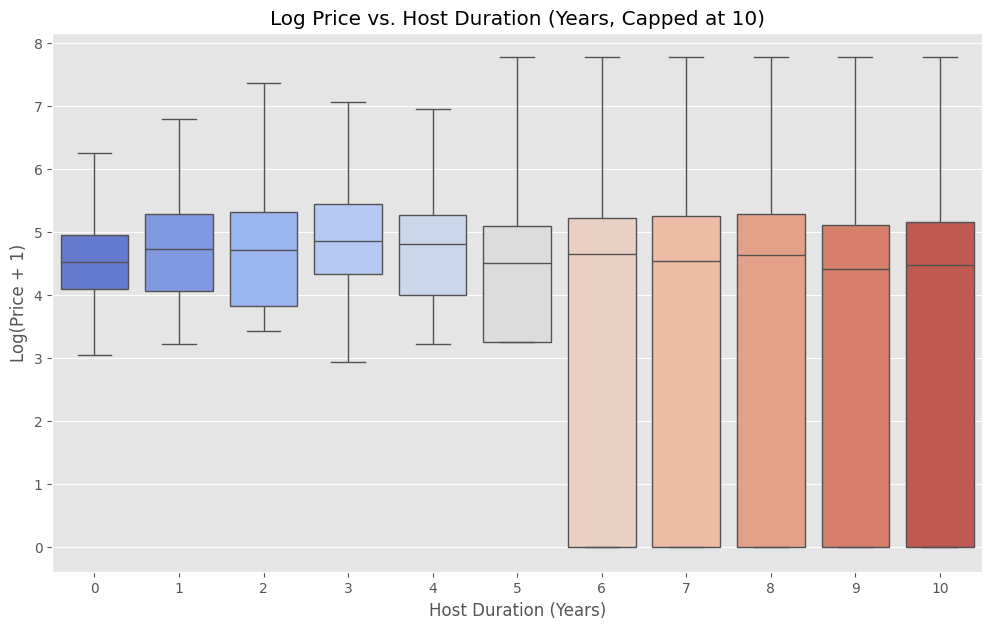

In [10]:
# Example: Effect of 'host_duration_days'
if df is not None and 'host_duration_days' in df.columns and 'price_log' in df.columns:
    plt.figure(figsize=(12, 7))
    # Bin the host duration for better visualization (e.g., into years)
    df['host_duration_years'] = (df['host_duration_days'] // 365).astype(int)
    # Cap at a max value for readability
    max_years = 10
    df['host_duration_years_capped'] = df['host_duration_years'].clip(upper=max_years)
    
    sns.boxplot(data=df, x='host_duration_years_capped', y='price_log', showfliers=False, palette='coolwarm')
    plt.title(f'Log Price vs. Host Duration (Years, Capped at {max_years})')
    plt.xlabel('Host Duration (Years)')
    plt.ylabel('Log(Price + 1)')
    plt.show()
else:
    print("'host_duration_days' or 'price_log' not found or data not loaded.")

## 5. Task 4: Prototyping New Features (Optional)

This section is where you would experiment with creating new features *before* adding them to `src/features.py`.


Correlation of PROTOTYPE 'bedrooms_per_person' with price:
                           bedrooms_per_person_proto     price
bedrooms_per_person_proto                   1.000000  0.054716
price                                       0.054716  1.000000


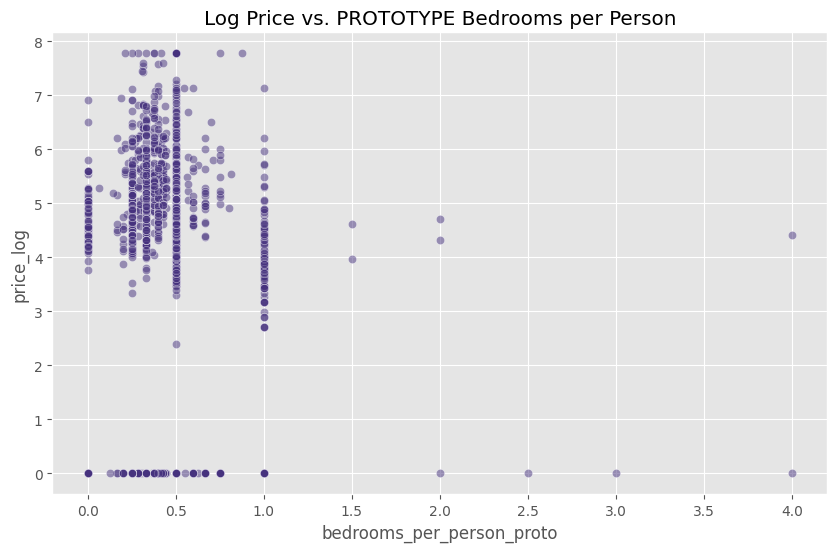

In [11]:
# Example: Create 'bedrooms_per_person' feature
if df is not None and 'bedrooms' in df.columns and 'accommodates' in df.columns:
    # Avoid division by zero
    df['accommodates_safe'] = df['accommodates'].replace(0, 1)
    df['bedrooms_per_person_proto'] = df['bedrooms'] / df['accommodates_safe']
    
    # Check its correlation with price
    print("\nCorrelation of PROTOTYPE 'bedrooms_per_person' with price:")
    print(df[['bedrooms_per_person_proto', 'price']].corr(method='spearman'))
    
    # Visualize it
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df.sample(min(2000, len(df))), x='bedrooms_per_person_proto', y='price_log', alpha=0.5)
    plt.title('Log Price vs. PROTOTYPE Bedrooms per Person')
    plt.show()
    
    # Clean up temporary columns if you don't need them later in the notebook
    # df = df.drop(columns=['accommodates_safe', 'bedrooms_per_person_proto'])
else:
    print("Required columns for 'bedrooms_per_person' not found or data not loaded.")

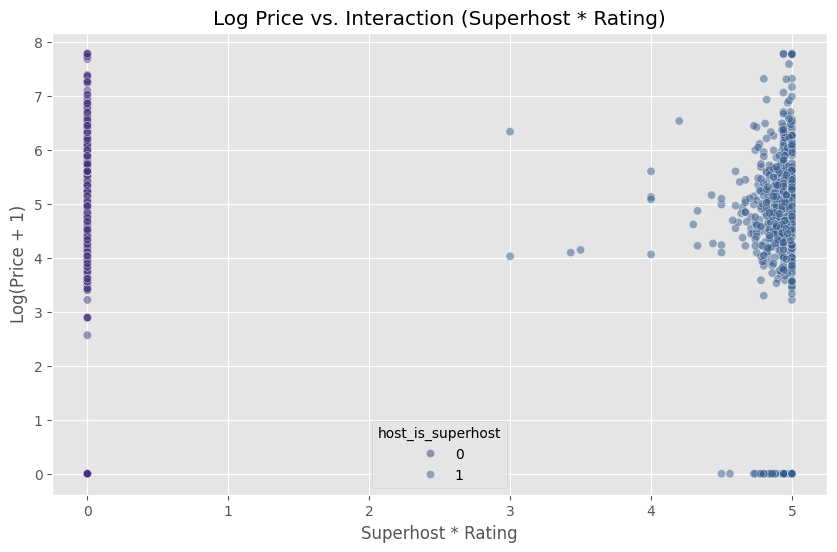

In [12]:
# Example: Interaction Feature - Superhost x Review Score
if df is not None and 'superhost_x_rating' in df.columns and 'price_log' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df.sample(min(2000, len(df))), x='superhost_x_rating', y='price_log', alpha=0.5, hue='host_is_superhost')
    plt.title('Log Price vs. Interaction (Superhost * Rating)')
    plt.xlabel('Superhost * Rating')
    plt.ylabel('Log(Price + 1)')
    plt.show()
else:
    print("'superhost_x_rating' not found or data not loaded.")